In [48]:
import numpy as np
from numpy import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import sys 
import shutil
from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import read_csv
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
from pandas import DataFrame
from pandas import DataFrame
import sktime
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from scipy.signal import find_peaks
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [49]:
#Data location
pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/Luigino/ON_data/"
pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/Luigino/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_degree/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_degree/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five_gold/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five_gold/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/three_five_gold/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/three_five_gold/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four/OFF_data/"


# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_err_bronze/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four_err_bronze/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_err_bronze/OFF_data/"

In [50]:
#Storing in a list the adresses of all the data files in the notebook

data_files_ON=[]
file_names_ON=[]

data_files_OFF=[]
file_names_OFF=[]
data_files_ALL=[]
file_names_ALL=[]

#Storing in a list the adresses of all the data files in the notebook
for filename in os.listdir(pathOFF):
    f = os.path.join(pathOFF,filename)
    if os.path.isfile(f):
        data_files_OFF.append(f)
        file_names_OFF.append(filename)
        data_files_ALL.append(f)
        file_names_ALL.append(filename)
for filename in os.listdir(pathON):
    f = os.path.join(pathON,filename)
    if os.path.isfile(f):
        data_files_ON.append(f)
        file_names_ON.append(filename)
        data_files_ALL.append(f)
        file_names_ALL.append(filename)     

In [51]:

#Filling arrays with ON class data and OFF class data
binning=37

dataON=[]
dataOFF=[]

for i in range(len(data_files_OFF)):

    dataOFF.append(data_files_OFF[i])

for i in range(len(data_files_ON)):

    dataON.append(data_files_ON[i])


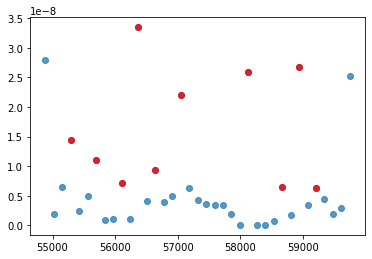

In [52]:
dataframe=pd.read_csv(dataOFF[44],index_col=[0])
dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']

time=np.array(dataframe['MJD'])
array=np.array(dataframe['Flux'])
delta_flux=np.array(dataframe['Delta Flux'])


indices = find_peaks(array)

#Formatting indices array - last element is a tuple
indices=np.delete(indices,-1)

#Geetting peak magnitudes and corresponding times
y=[array[j] for j in indices]
x=[time[j] for j in indices]



#Formatting arrays
x=np.hstack(x)
y=np.hstack(y)


plt.scatter(time,array,alpha=0.75)
plt.scatter(x,y,color='r',alpha=0.75)

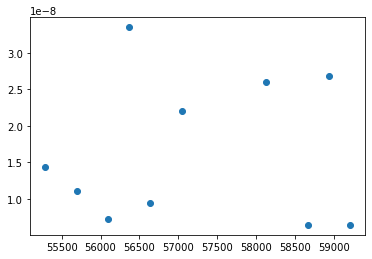

In [53]:
plt.scatter(x,y)

In [54]:

def peak_study(array,time,delta_array):    

    #<Getting indices of  peaks
    indices = find_peaks(array)
    #Formatting indices array - last element is a tuple
    indices=np.delete(indices,-1)
    
    #Scaling the lightcurve to the lightcurve
    scaler = MinMaxScaler()
    array2=array.reshape(-1,1)
    scaler.fit(array2)
    array2=scaler.transform(array2)
    
    #Scaling the MJD 
    scaler = MinMaxScaler()
    time2=time.reshape(-1,1)
    scaler.fit(time2)
    time2=scaler.transform(time2)     
    
    #Geetting peak magnitudes and corresponding times
    y=[array2[j] for j in indices]
    x=[time2[j] for j in indices]
    
    y_err=[delta_array[j] for j in indices]
    
    #Formatting arrays
    x=np.hstack(x)
    y=np.hstack(y)
    y_err=np.hstack(y_err)
    
    std_peaks=np.std(y)

    #Formatting - get all indices within array - not fiirst value in array
    indices=indices[0]
    
    #Getting baseline feature
    baseline=np.delete(array2,indices)
    baseline=np.mean(baseline) 
    
    # Getting feature : Biggest peak to smallest peak magnitude difference - scaled to array
    mini=np.argmin(y)
    idx_min=indices[mini]
    minimum=array2[idx_min]
    maxi=np.argmax(y)
    idx_max=indices[maxi]
    maximum=array2[idx_max]
    min_max_peak=maximum-minimum
    
#     Error randomization code
#     arr=[1,-1]
#     for i in range(len(y)):
#         if np.isnan(y[i])==False:
#             error=y_err[i]
#             choice=np.random.choice(arr,1)
#             if choice ==1:
#                 y[i]=y[i]+error
#             if choice==-1:
#                 y[i]=y[i]-error

    #Unused array
    peak_magnitudes=y
    
    #One to second biggest peak features
    copy_flux=array2.copy()
    copy_time=time2.copy()
    a=np.argmax(copy_flux)
    ymax1=copy_flux[a]
    tmax1=time2[a]
    copy_flux[a]=0
    a=np.argmax(copy_flux)
    ymax2=copy_flux[a]
    tmax2=copy_time[a]
    one_to_second_flux=abs(ymax1-ymax2)
    one_to_second_time=abs(tmax1-tmax2)
    
    #Number of peaks in lightcurve feature
    nb_peaks=len(y)
    
    delta_energy_arr=[]
    delta_time_arr=[]
    for i in range(nb_peaks-1):
        
        delta = x[i+1]-x[i]
        delta_energy=abs(y[i+1]-y[i])
        delta_time_arr.append(delta)
        delta_energy_arr.append(delta_energy)
        
    #Getting other peak features from scaled peaks
    delay_std=np.std(delta_time_arr)
    NG_diff_mean_peaks=np.mean(delta_energy_arr)
    peaks_time_delay=np.mean(delta_time_arr)
    
    max_time_delay=max(delta_time_arr)
    min_time_delay=min(delta_time_arr)
    max_diff_mean_peaks=max(y)-np.mean(y)
    min_diff_mean_peaks=min(y)-np.mean(y)
    var_peaks=np.var(y)
    std=np.std(array2)
    mean_peaks=np.mean(y)
    
    #Getting unscaled features for lightcurve
    mean_arr=np.mean(array2)
    maxi=max(array)
    mini=min(array)
    amplitude=max(array)-min(array)
    
        
    return x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline


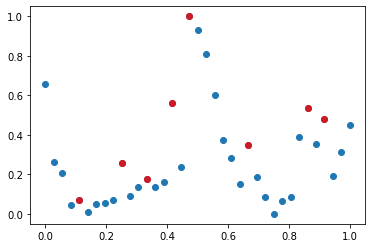

In [55]:
#plot the new array2[0] time2[0]
dataframe=pd.read_csv(dataOFF[0],index_col=[0])
dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']

mjd=np.array(dataframe['MJD'])
flux=np.array(dataframe['Flux'])
delta_flux=np.array(dataframe['Delta Flux'])
x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)


plt.scatter(time2,array2)
plt.scatter(x,y,color='r',alpha=0.75)

In [56]:
#Machine learning section and testing

In [57]:
#Calculating features and putting them in arrays for each class

lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF

Labels=[]



nb_peaks_arr_flux =[]
peak_magnitudes_arr_flux =[]
peaks_time_delay_arr_flux =[]
std_peaks_arr_flux =[]
mean_peaks_arr_flux =[]
NG_diff_mean_peaks_arr_flux =[]
max_diff_mean_peaks_arr_flux =[]
min_diff_mean_peaks_arr_flux =[]
mean_arr_flux=[]
max_arr_flux=[]
min_arr_flux=[]
amplitude_flux=[]
std_flux=[]
one_two_flux=[]
one_two_time=[]
min_max=[]
min_deltaT=[]
max_deltaT=[]
deltaT_std=[]
BASEline=[]


for i in range(len(dataOFF)):
    
    dataframe=pd.read_csv(dataOFF[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    delta_flux=np.array(dataframe['Delta Flux'])
    
    #Getting features for the corresponding source
    x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)
                                                                                                                                           
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)

    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
    BASEline.append(baseline)

for i in range(len(dataON)):
    
    dataframe=pd.read_csv(dataON[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    delta_flux=np.array(dataframe['Delta Flux'])
    
    #Getting features for the corresponding source
    x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)
    
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)
    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
    BASEline.append(baseline)

#Creating labels
for i in range(lgOFF):
    
    Labels.append(int(0))
    
for i in range(lgON):
    Labels.append(int(1))

In [62]:
#Filling data matrix with features

nbfeatures=12

data_matrix=np.zeros((nbfeatures,lg))

# data_matrix[0]=nb_peaks_arr_flux
data_matrix[0]=peaks_time_delay_arr_flux

data_matrix[1]=std_peaks_arr_flux

data_matrix[2]=deltaT_std

data_matrix[3]=mean_peaks_arr_flux
data_matrix[4]=min_max
data_matrix[5]=std_flux

data_matrix[6]=mean_arr_flux

data_matrix[7]=one_two_flux
data_matrix[8]=one_two_time

data_matrix[9]=NG_diff_mean_peaks_arr_flux
data_matrix[10]=max_diff_mean_peaks_arr_flux
data_matrix[11]=min_diff_mean_peaks_arr_flux




#first feature
print(data_matrix[0].shape)

data_matrix=data_matrix.reshape((lg,nbfeatures))

#first source
print(data_matrix[0].shape)


(1142,)
(12,)


In [63]:
nbfeatures=12

data_matrix=np.zeros((nbfeatures,lg))

data_matrix[0]=peaks_time_delay_arr_flux
data_matrix[1]=std_peaks_arr_flux
data_matrix[2]=deltaT_std
data_matrix[3]=mean_peaks_arr_flux


print(data_matrix[0].shape)

data_matrix=data_matrix.reshape((lg,nbfeatures))

print(data_matrix[0].shape)

(1142,)
(12,)


In [65]:
data_matrix=np.zeros((nbfeatures,lg))

data_matrix = np.vstack((peaks_time_delay_arr_flux,
                        std_peaks_arr_flux,
                        deltaT_std,
                        mean_peaks_arr_flux))
print(data_matrix[0].shape)

(1142,)



(4,)


In [12]:
# Filling data matrix with features

nbfeatures=9

data_matrix=np.zeros((nbfeatures,lg))


data_matrix[0]=mean_peaks_arr_flux
data_matrix[1]=min_max
data_matrix[2]=std_flux

data_matrix[3]=mean_arr_flux

data_matrix[4]=one_two_flux
data_matrix[5]=one_two_time

data_matrix[6]=NG_diff_mean_peaks_arr_flux
data_matrix[7]=max_diff_mean_peaks_arr_flux
data_matrix[8]=min_diff_mean_peaks_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

In [13]:
#Filling data matrix with features

nbfeatures=7

data_matrix=np.zeros((nbfeatures,lg))


# data_matrix[6]=mean_peaks_arr_flux

data_matrix[6]=std_flux

data_matrix[0]=mean_arr_flux

# data_matrix[0]=one_two_flux
data_matrix[1]=one_two_time

data_matrix[2]=NG_diff_mean_peaks_arr_flux
data_matrix[3]=max_diff_mean_peaks_arr_flux
data_matrix[4]=min_diff_mean_peaks_arr_flux
data_matrix[5]=min_max
# data_matrix[6]=mean_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

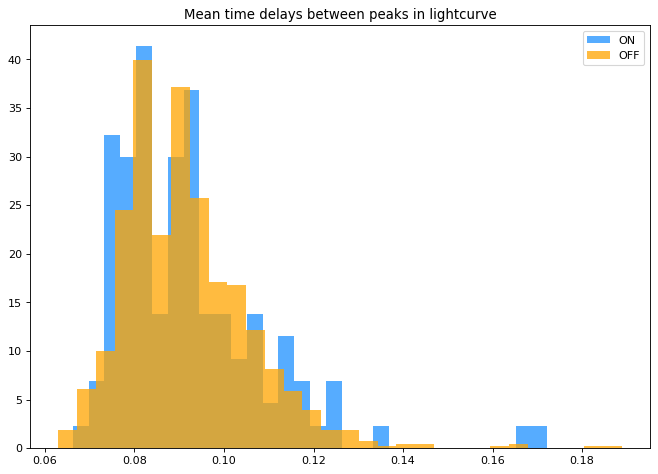

In [14]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(peaks_time_delay_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(peaks_time_delay_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Mean time delays between peaks in lightcurve")
plt.legend();
#interesting

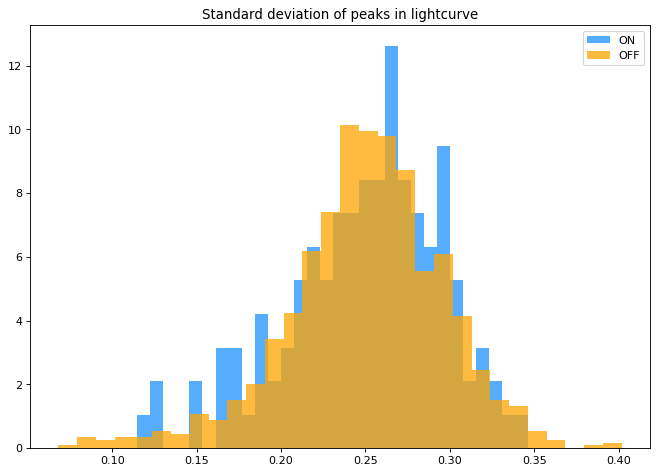

In [15]:

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(std_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(std_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Standard deviation of peaks in lightcurve")
plt.legend();
# Measure of how much the magnitude of the peaks varies

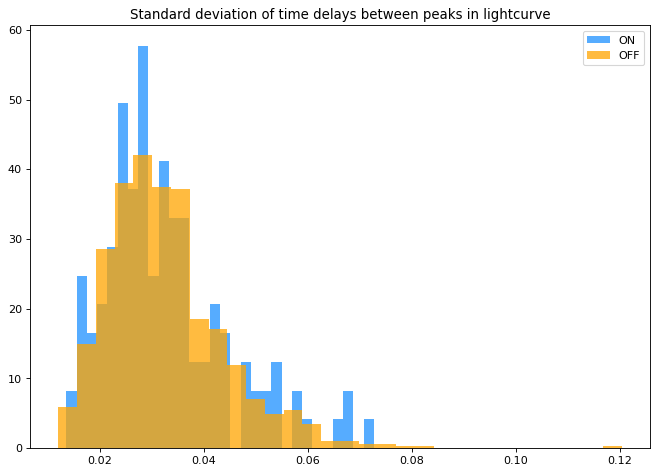

In [16]:

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(deltaT_std[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(deltaT_std[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Standard deviation of time delays between peaks in lightcurve")
plt.legend();

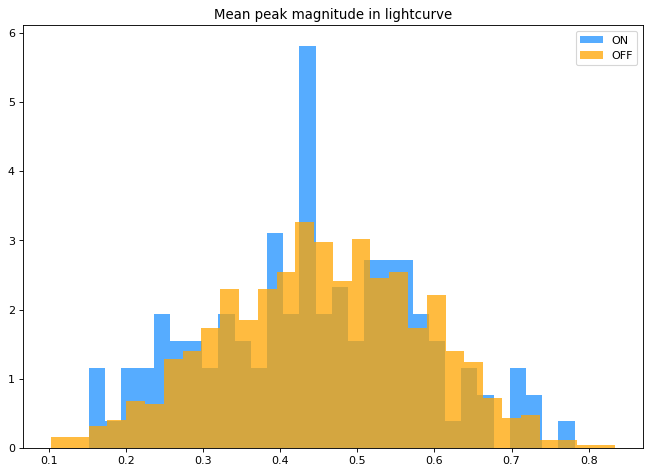

In [17]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Mean peak magnitude in lightcurve")
plt.legend();
#Interesting

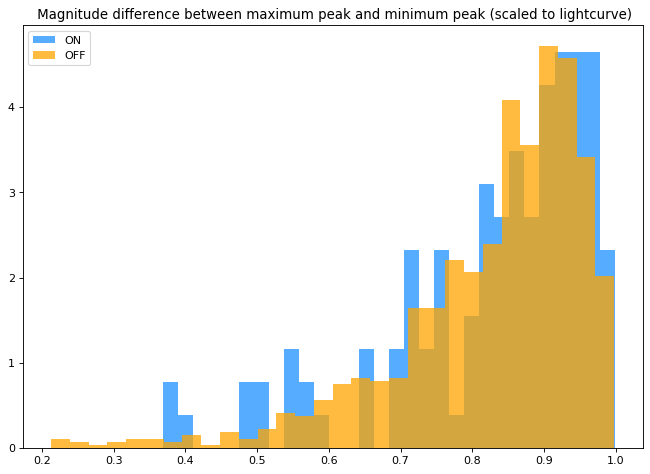

In [18]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
min_max=np.hstack(min_max)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(min_max[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(min_max[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title(" Magnitude difference between maximum peak and minimum peak (scaled to lightcurve)")
plt.legend();

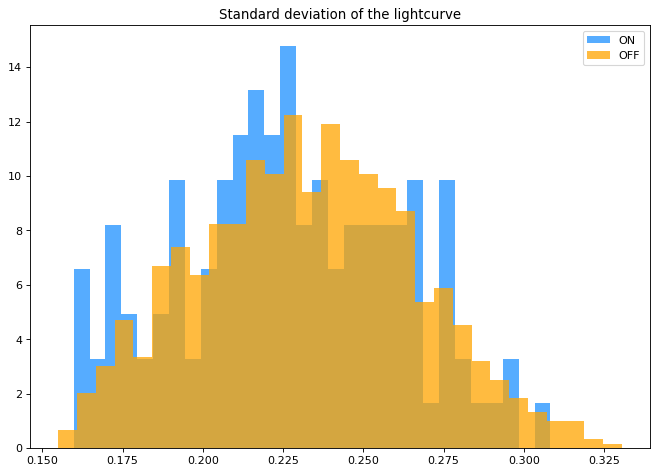

In [19]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(std_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(std_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Standard deviation of the lightcurve")
plt.legend();

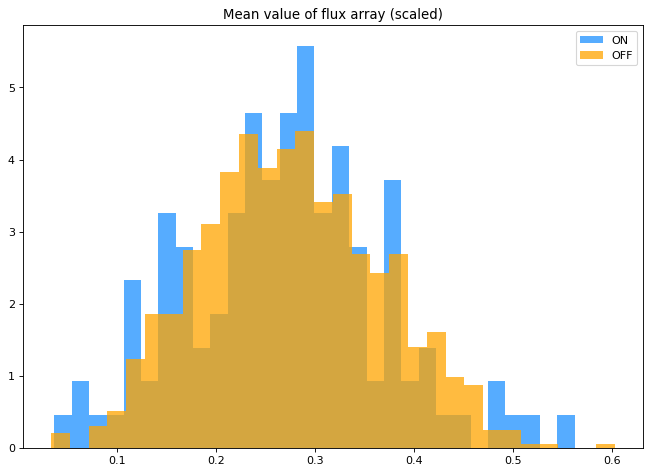

In [20]:


plt.figure(figsize=(10,7), dpi= 80)
plt.hist(mean_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(mean_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Mean value of flux array (scaled)")
plt.legend();

In [21]:
print(mean_arr_flux)

[0.29240700189070723, 0.2829276789311113, 0.33926448949805493, 0.20980282228410507, 0.33010651547868436, 0.3092627440296958, 0.29071413852154626, 0.3484893123760569, 0.21984924381529564, 0.18891483579995824, 0.19885342107774565, 0.42583525315897525, 0.2824074595841536, 0.2558198691972456, 0.4324423980897644, 0.21006813025379528, 0.4241170049299362, 0.2635330114440005, 0.253903506063779, 0.05221417588437638, 0.3164368120157844, 0.2855127122145804, 0.4368443906034052, 0.31971415660080504, 0.23821319560411805, 0.37389938337958306, 0.3363499647335561, 0.242235630706317, 0.2089714582811893, 0.3151315520194873, 0.3279850051828643, 0.33694115332210767, 0.3294667530436475, 0.35056734603281453, 0.2399892681714651, 0.2563430925991722, 0.4503403387334887, 0.22399737766157163, 0.36751066655529735, 0.24890099139247157, 0.211176672040117, 0.1766890861676009, 0.29916897245703095, 0.2392986790068337, 0.22947767516530665, 0.3037431435825047, 0.3976010755625049, 0.24838729697010695, 0.2866922753906939, 

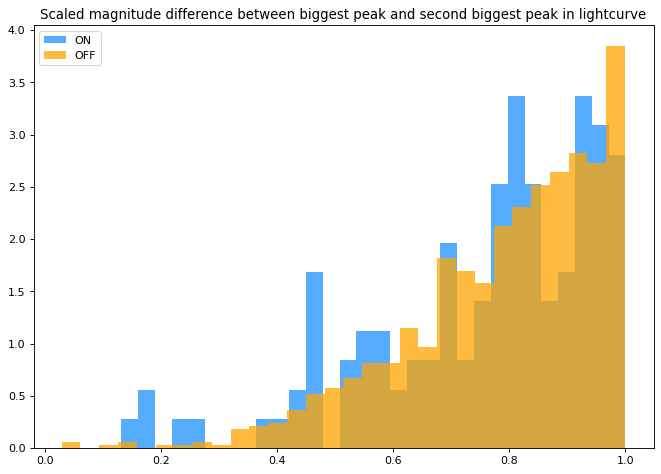

In [22]:
one_two_flux=np.hstack(one_two_flux)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(one_two_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(one_two_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Scaled magnitude difference between biggest peak and second biggest peak in lightcurve")
plt.legend();

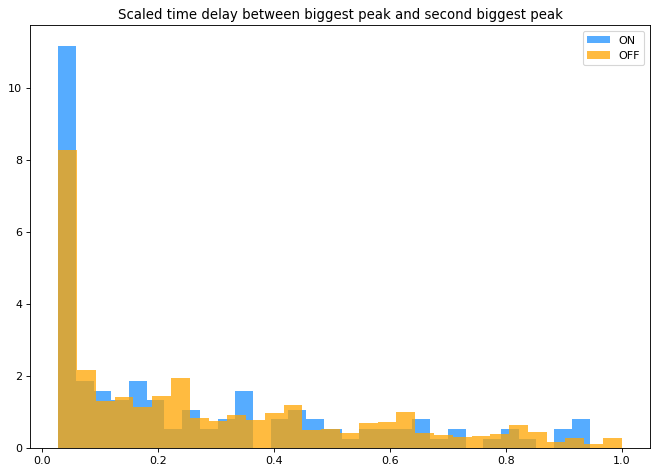

In [23]:

one_two_time=np.hstack(one_two_time)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(one_two_time[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(one_two_time[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Scaled time delay between biggest peak and second biggest peak")
plt.legend();

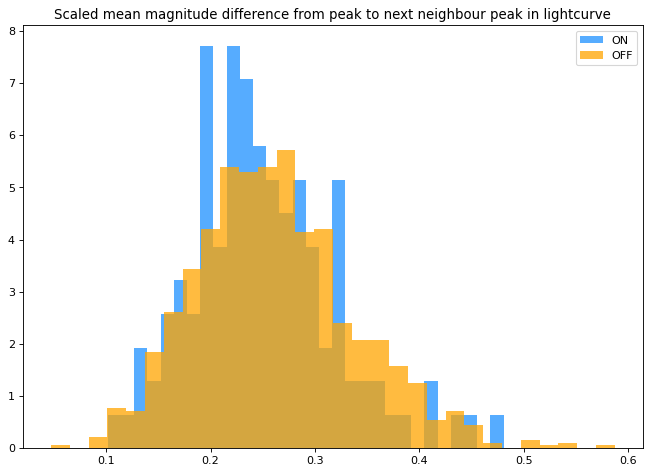

In [24]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(NG_diff_mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(NG_diff_mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Scaled mean magnitude difference from peak to next neighbour peak in lightcurve")
plt.legend();

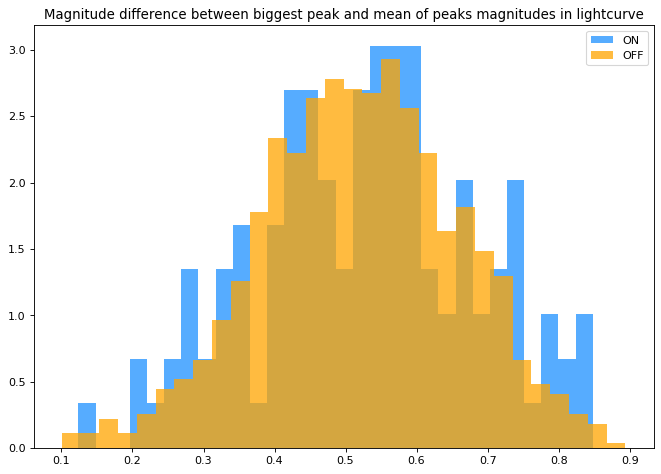

In [25]:
max_diff_mean_peaks_arr_flux=np.hstack(max_diff_mean_peaks_arr_flux)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(max_diff_mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(max_diff_mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Magnitude difference between biggest peak and mean of peaks magnitudes in lightcurve")
plt.legend();

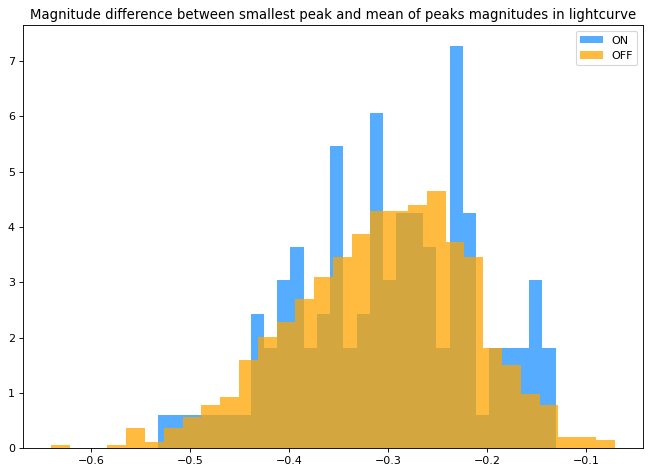

In [26]:
min_diff_mean_peaks_arr_flux=np.hstack(min_diff_mean_peaks_arr_flux)
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(min_diff_mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON",density=True,alpha=0.75,bins=30)
plt.hist(min_diff_mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF",density=True,alpha=0.75,bins=30)
plt.title("Magnitude difference between smallest peak and mean of peaks magnitudes in lightcurve")
plt.legend();

In [27]:
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
# import mglearn
import graphviz
fscore=[]
prec_score=[]

#Class weights values 
lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF
print(lgOFF,lgON)
weight_for_0 = (1 / lgOFF) * (lg / 2.0)
weight_for_1 = (1 / lgON) * (lg / 2.0)
print(weight_for_0,weight_for_1)
class_weight = {0: weight_for_0, 1: weight_for_1}

iterations=1
#print(Labels)
#random.seed(0)
#Labels=np.array(np.random.permutation(Labels))
#data_matrix=np.random.permutation(data_matrix)
#print(Labels)

#for i in range(10,11):
# for i in range(iterations):
i=38
x_train, x_test, y_train, y_test = train_test_split(data_matrix, Labels, test_size=0.5, random_state=i)

#print(y_train)

model = RandomForestClassifier(n_estimators=2000,
                               random_state=i,
                               class_weight = class_weight)

    
model.fit(x_train, y_train)
prediction= model.predict(x_test)
f1= f1_score(y_test,prediction)
score=precision_score(y_test,prediction)
fscore.append(f1)
prec_score.append(score)

    
print("F1 score: ",np.mean(fscore))
print("Precision score:",np.mean(prec_score))
# print(y_test-prediction)


1019 123
0.5603532875368007 4.642276422764228
F1 score:  0.7758620689655172
Precision score: 0.75


In [660]:

nbfeatures=9

data_matrix=np.zeros((nbfeatures,lg))


data_matrix[0]=mean_peaks_arr_flux
data_matrix[1]=min_max
data_matrix[2]=std_flux

data_matrix[3]=mean_arr_flux

data_matrix[4]=one_two_flux
data_matrix[5]=one_two_time

data_matrix[6]=NG_diff_mean_peaks_arr_flux
data_matrix[7]=max_diff_mean_peaks_arr_flux
data_matrix[8]=min_diff_mean_peaks_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

In [ ]:
#Filling data matrix with features

nbfeatures=7

data_matrix=np.zeros((nbfeatures,lg))


# data_matrix[6]=mean_peaks_arr_flux

data_matrix[6]=std_flux

data_matrix[0]=mean_arr_flux

# data_matrix[0]=one_two_flux
data_matrix[1]=one_two_time

data_matrix[2]=NG_diff_mean_peaks_arr_flux
data_matrix[3]=max_diff_mean_peaks_arr_flux
data_matrix[4]=min_diff_mean_peaks_arr_flux
data_matrix[5]=min_max
# data_matrix[6]=mean_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

''

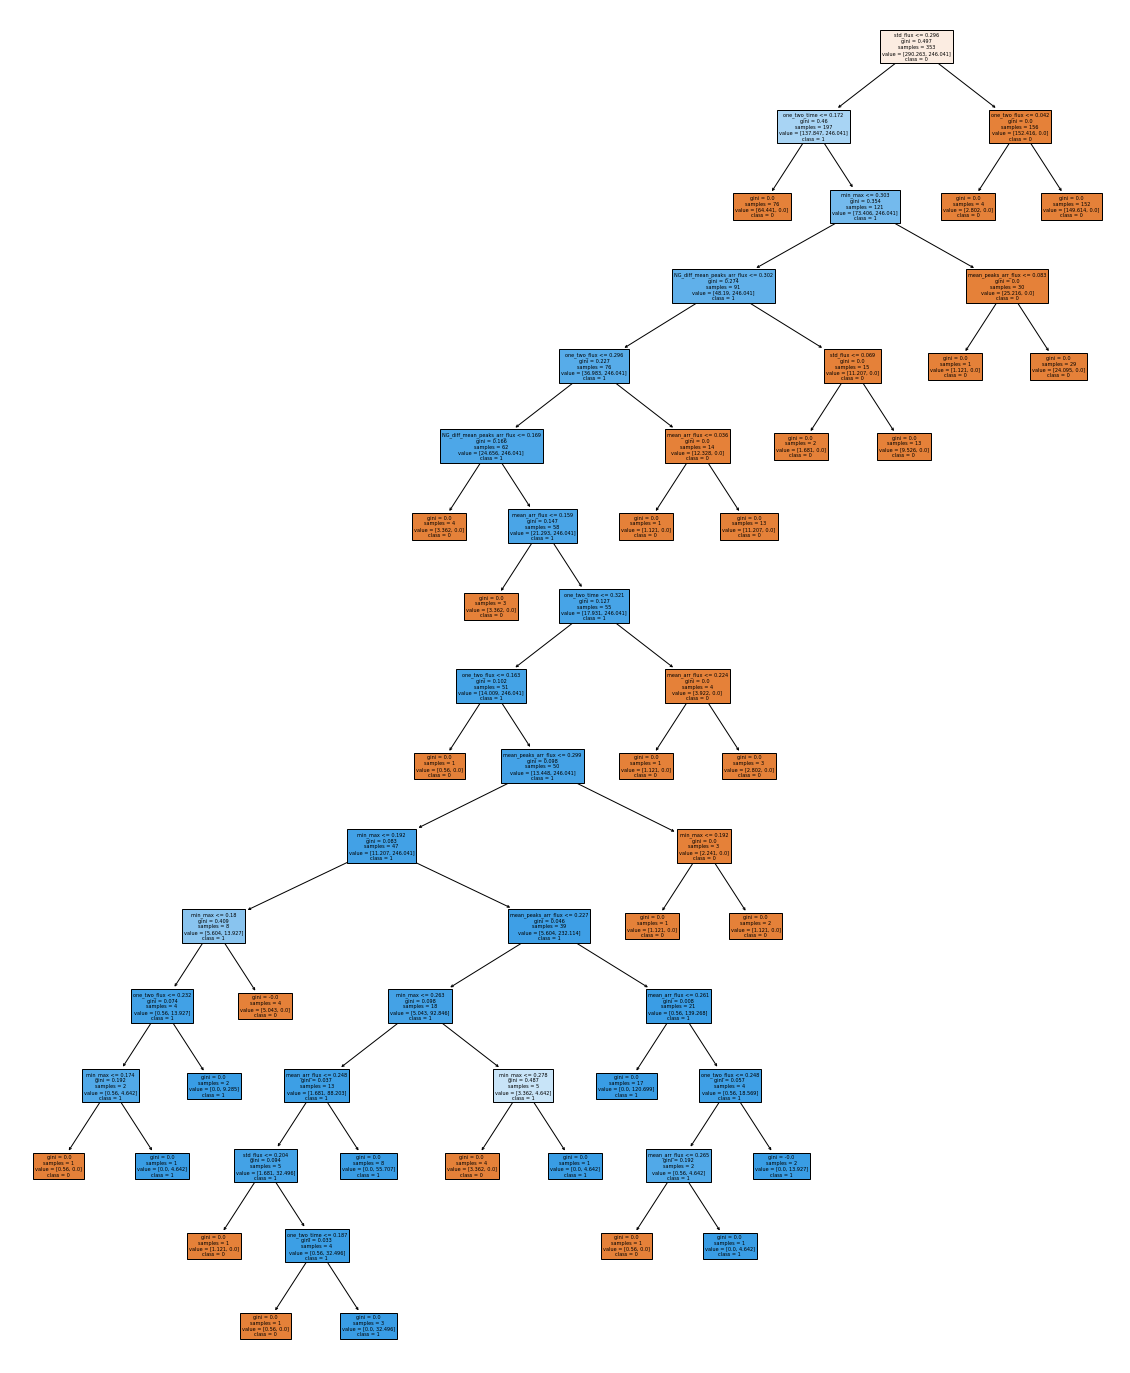

In [31]:

from sklearn import tree
class_Names=['0','1']
features_names=['mean_peaks_arr_flux','min_max','std_flux','mean_arr_flux',
                'one_two_flux','one_two_time','NG_diff_mean_peaks_arr_flux',
                'max_diff_mean_peaks_arr_flux','min_diff_mean_peaks_arr_flux']



from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 25))
plot_tree(model.estimators_[0], 
          feature_names=features_names,
          class_names=class_Names, 
          filled=True, impurity=True, 
          rounded=False)
;

In [669]:
#Filling data matrix with features

nbfeatures=7

data_matrix=np.zeros((nbfeatures,lg))


# data_matrix[6]=mean_peaks_arr_flux

data_matrix[6]=std_flux

data_matrix[0]=mean_arr_flux

# data_matrix[0]=one_two_flux
data_matrix[1]=one_two_time

data_matrix[2]=NG_diff_mean_peaks_arr_flux
data_matrix[3]=max_diff_mean_peaks_arr_flux
data_matrix[4]=min_diff_mean_peaks_arr_flux
data_matrix[5]=min_max
# data_matrix[6]=mean_arr_flux

data_matrix=data_matrix.reshape((lg,nbfeatures))

''

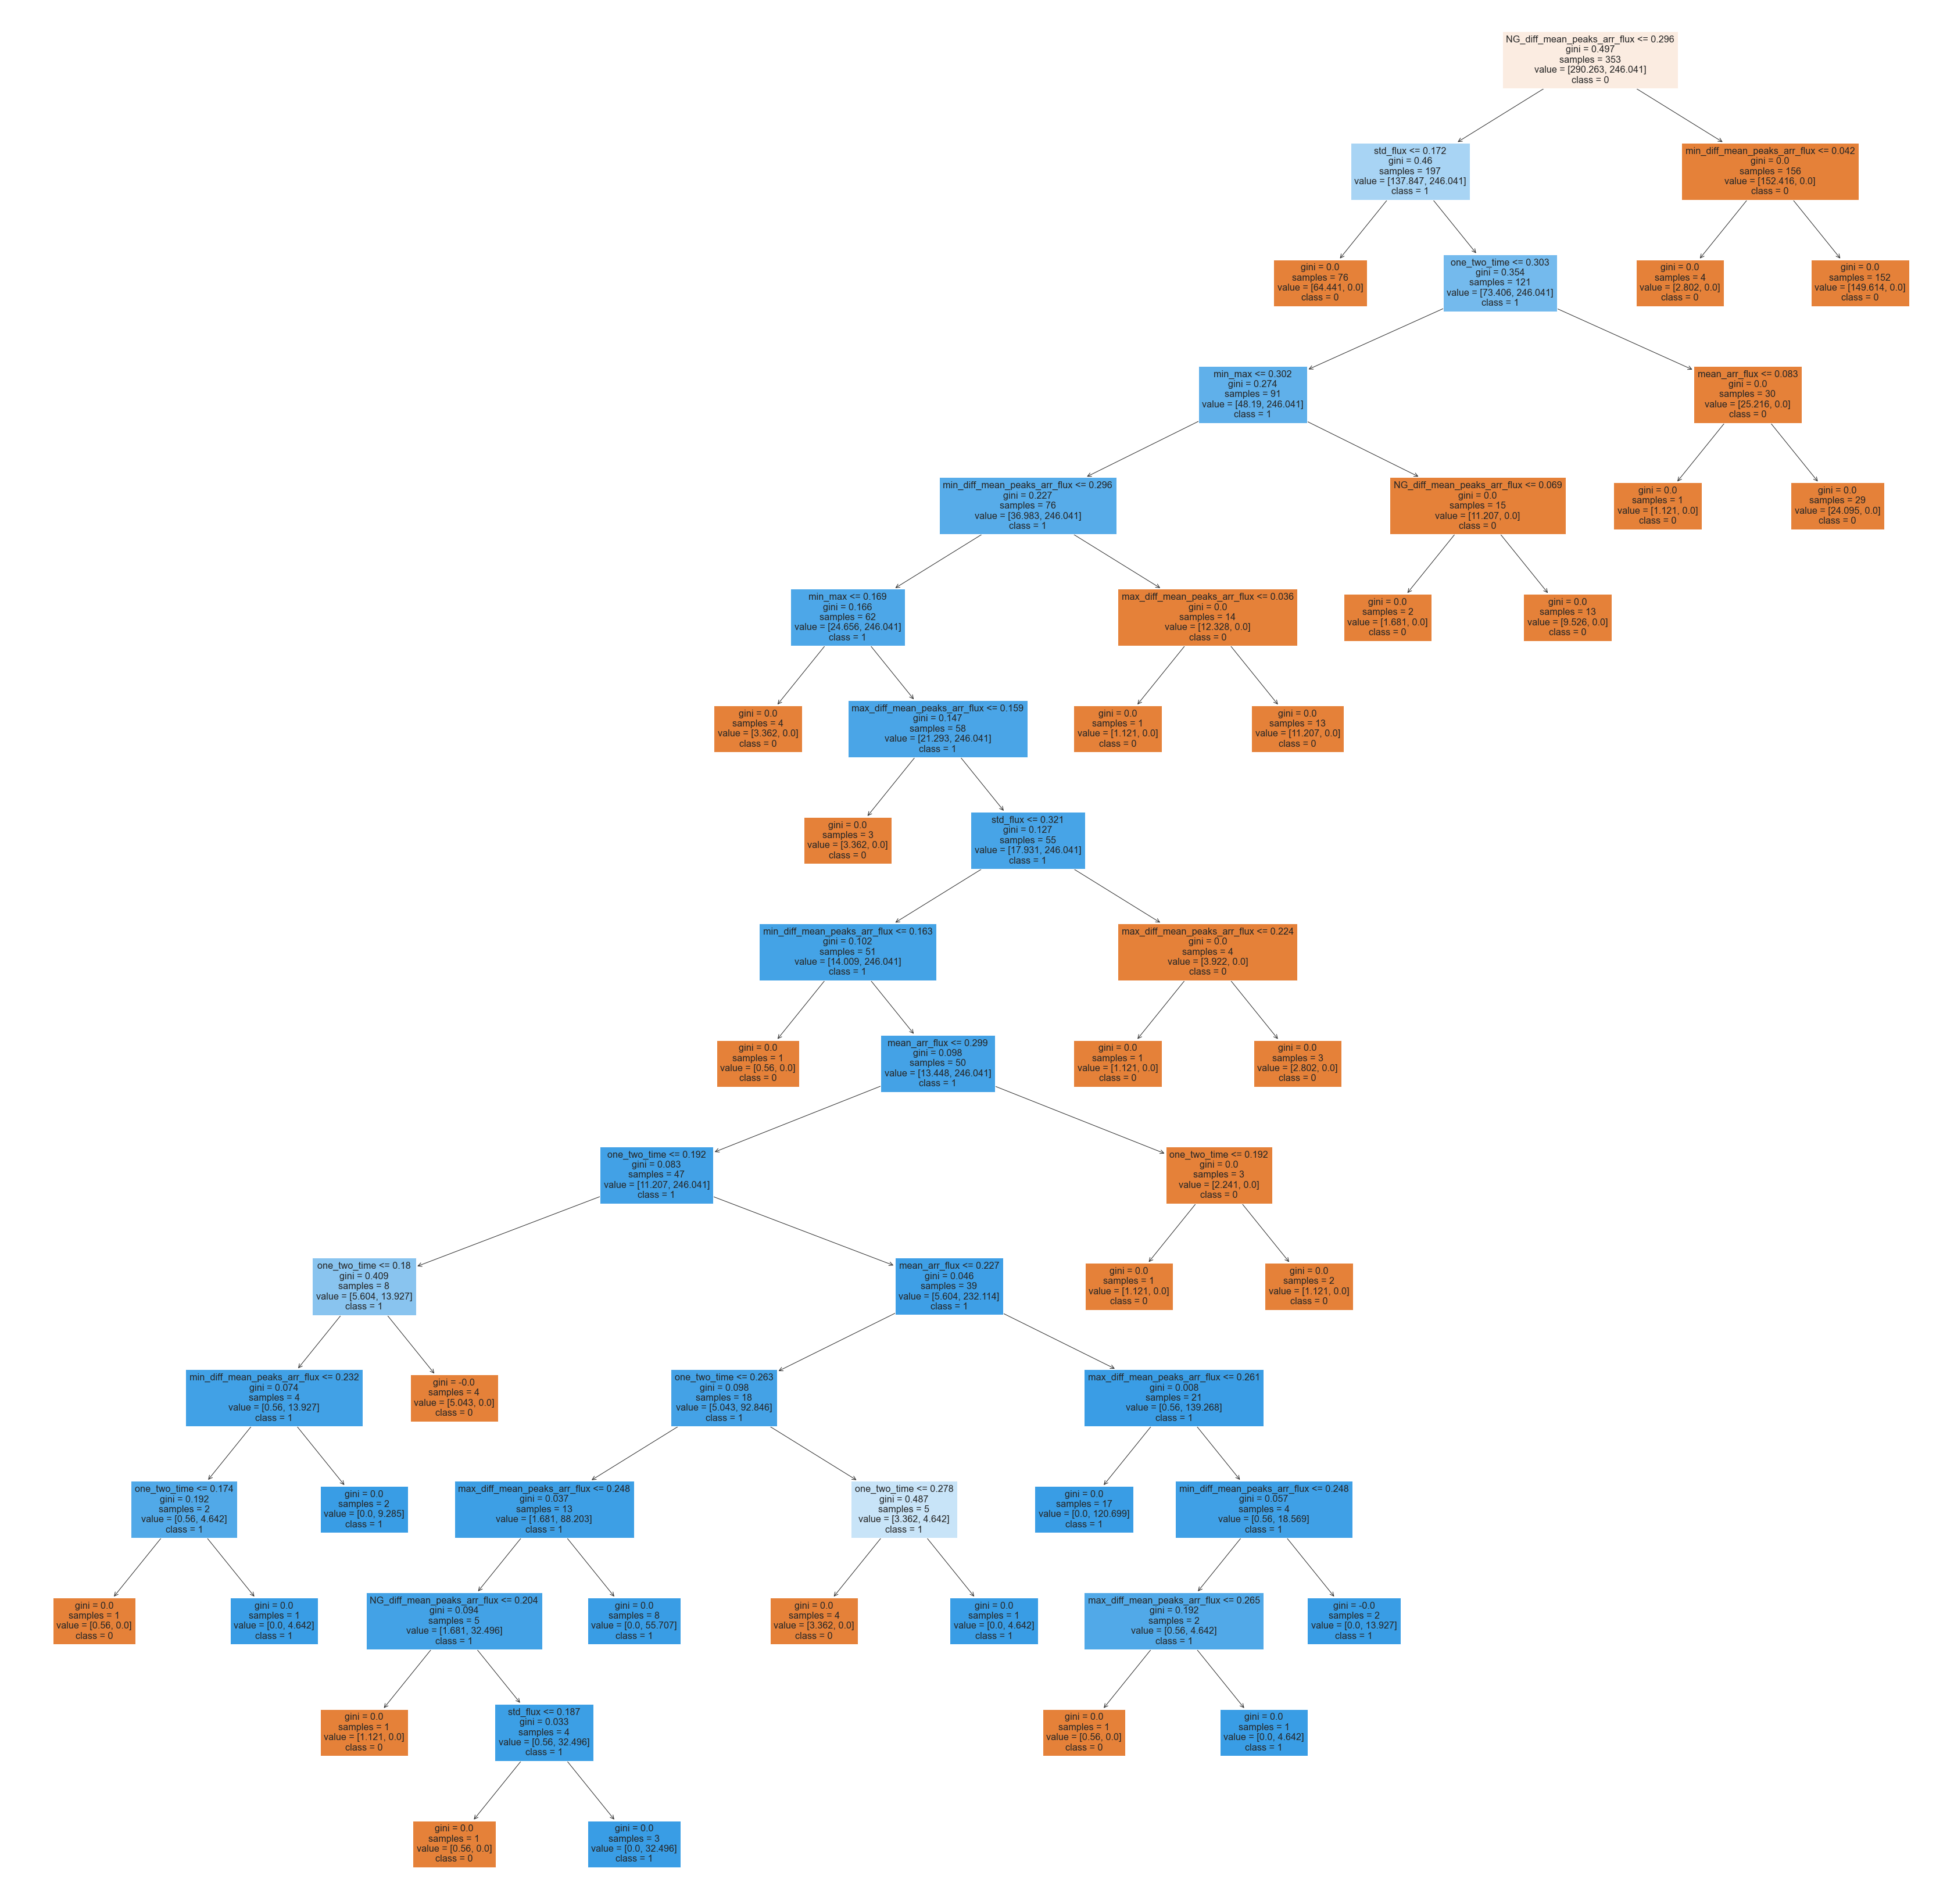

In [680]:

from sklearn import tree
class_Names=['0','1']
features_names=['mean_arr_flux','one_two_time','NG_diff_mean_peaks_arr_flux',
                'max_diff_mean_peaks_arr_flux','min_diff_mean_peaks_arr_flux','std_flux' ,'min_max']



from sklearn.tree import plot_tree

fig = plt.figure(figsize=(60, 60))
plot_tree(model.estimators_[0], 
          feature_names=features_names,
          class_names=class_Names, 
          filled=True, impurity=True, 
          rounded=False)
;

In [646]:
from dtreeviz.trees import dtreeviz


viz = dtreeviz(model.estimators_[0], x_test, y_test,
               target_name=1,
               feature_names=features_names,
               class_names=class_Names,
               title="0th decision tree")

viz.save("decision_tree_wine.svg")



AttributeError: 'list' object has no attribute 'dtype'

In [580]:
# print(len(prediction))
# print(prediction-y_test)


#Printing REAL LABELS vs PREDICTED LABELS

#REAL LABELS
#print("Real Labels: ")
#print(np.array(y_test))
#PREDICTED LABELS
#print("Predicted Labels: ")
#print(prediction)

In [538]:
#Score density distribution

dens = model.predict_proba(x_test)

#print(dens)

OFFF=[]
ONN=[]
idx_ON=[]
idx_OFF=[]
for i in range(len(y_test)):
    
    if y_test[i]==1:
        idx_ON.append(i)
    if y_test[i]==0:
        idx_OFF.append(i)        

#print()
        
        # for i in range(len(idx_ON)):
    
#     a=idx_ON[i]
#     OFFF.append(dens[a][0])
#     ONN.append(dens[a][1])
         
for i in range(len(dens)):
        
        OFFF.append(dens[i][0])
        ONN.append(dens[i][1])
        
ONN_true=[ONN[j] for j in idx_ON]
OFF_true=[ONN[j] for j in idx_OFF]

print(ONN_true)


[0.921, 0.558, 0.749, 0.737, 0.703, 0.678, 0.955, 0.904, 0.667, 0.565, 0.873, 0.791, 0.87, 0.597, 0.823, 0.605, 0.774, 0.775, 0.789, 0.824, 0.409, 0.725, 0.898, 0.834, 0.743, 0.661, 0.833, 0.682, 0.636, 0.897, 0.752, 0.978, 0.931, 0.494, 0.801, 0.851, 0.759, 0.896, 0.701]


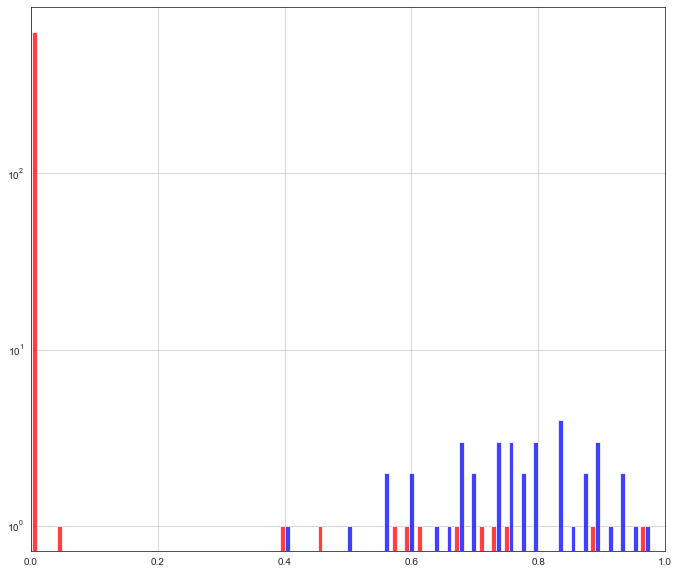

In [539]:
import seaborn as sns
sns.set_style("white")

# Plotting  model score distribution

#kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

colors = ['r','b']
fig1 = plt.figure(figsize=(25,10))
ax1 = fig1.add_subplot(121)
ax1.hist([OFF_true,ONN_true],50,color=colors,alpha=0.75)
#ax1.hist(OFF_true,20,color="r", label="Prob of being ON for all LC",density=True,alpha=0.75)
#ax1.hist(ONN_true,20,color="b", label="Prob of being ON for all LC",density=True,alpha=0.75)

#sns.distplot(ONN, color="g", label="Prob of beiung ON for all LC")
#sns.distplot(OFF_true, color="r", label="Prob of being ON for OFF LC")

plt.xlim(0,1)


#sns.distplot(ONN, color="dodgerblue", label="Prob ON")
#sns.distplot(OFFF, color="orange", label="OFF")
#plt.title("Score density")
ax1.set_yscale('log')
#plt.xlim(0,1)
#plt.ylim(0.01,800)
plt.grid()

#plt.legend();



(0.0, 1.0)

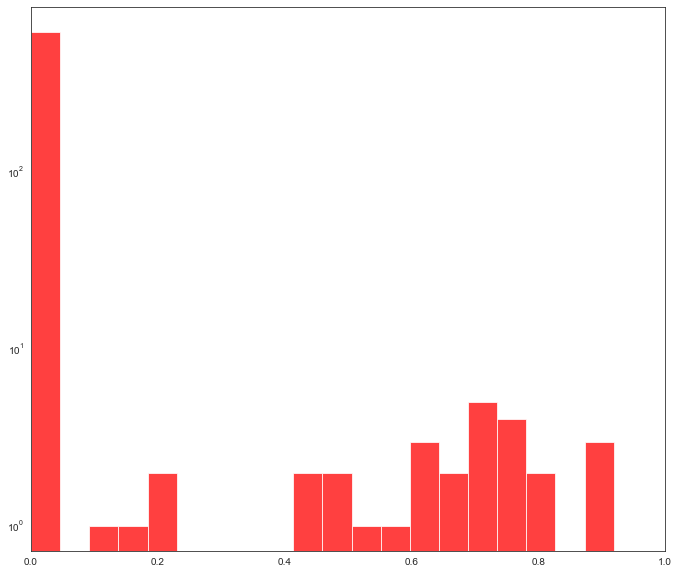

In [528]:

fig2 = plt.figure(figsize=(25,10))
ax2 = fig2.add_subplot(121)
ax2.hist(OFF_true,color="r", label="Prob of being ON for the OFF class", alpha=0.75,bins=20)
# sns.distplot(OFF_true, color="g", label="Prob of beiung ON for all LC")
ax2.set_yscale('log')

plt.xlim(0,1)


(array([3., 0., 0., 0., 0., 1., 0., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        1., 1., 2., 1., 2., 1., 1., 0., 1., 1., 2., 1., 1., 0., 0., 0., 0.,
        0., 0., 4., 1., 0., 2., 0., 1., 0., 1., 3., 1., 1., 1., 0., 2.]),
 array([0.311, 0.322, 0.333, 0.344, 0.355, 0.366, 0.377, 0.388, 0.399,
        0.41 , 0.421, 0.432, 0.443, 0.454, 0.465, 0.476, 0.487, 0.498,
        0.509, 0.52 , 0.531, 0.542, 0.553, 0.564, 0.575, 0.586, 0.597,
        0.608, 0.619, 0.63 , 0.641, 0.652, 0.663, 0.674, 0.685, 0.696,
        0.707, 0.718, 0.729, 0.74 , 0.751, 0.762, 0.773, 0.784, 0.795,
        0.806, 0.817, 0.828, 0.839, 0.85 , 0.861]),
 <BarContainer object of 50 artists>)

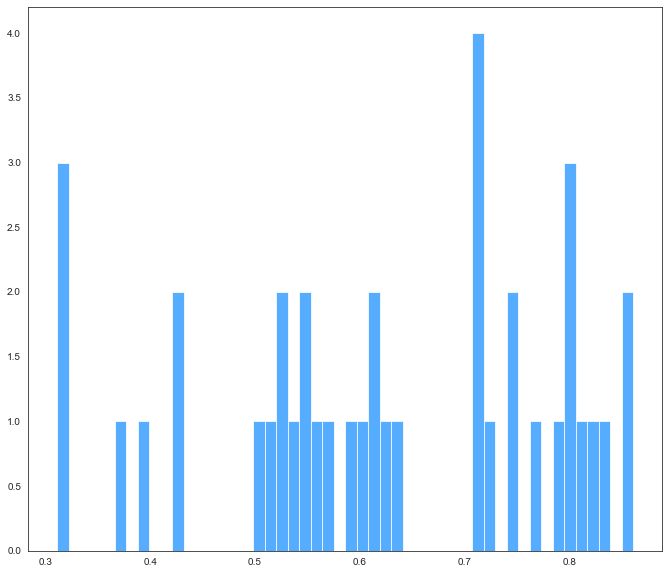

In [529]:

fig3 = plt.figure(figsize=(25,10))
ax3 = fig3.add_subplot(121)
ax3.hist(ONN_true,color="dodgerblue", label="Prob of being ON for the ON class",alpha=0.75,bins=50)
#plt.xlim(0,1)

In [482]:
ONN_true

[0.84,
 0.9,
 0.92,
 0.65,
 0.77,
 0.74,
 0.9,
 0.78,
 0.69,
 0.97,
 0.56,
 0.67,
 0.58,
 0.69,
 0.78,
 0.89,
 0.74,
 0.79,
 0.82,
 0.79,
 0.89,
 0.49,
 0.96,
 0.85,
 0.74,
 0.74,
 0.64,
 0.67,
 0.74,
 0.5,
 0.54,
 0.62,
 0.78,
 0.79,
 0.78,
 0.35,
 0.72,
 0.88,
 1.0,
 0.93,
 0.87,
 0.92,
 0.99,
 0.77,
 0.86,
 0.97,
 0.87,
 0.5,
 0.9,
 0.77,
 0.87,
 0.94,
 0.69,
 0.67]

In [483]:
model.feature_importances_

array([0.25450054, 0.17955159, 0.06440116, 0.05146027, 0.04435222,
       0.11928529, 0.05068378, 0.15582663, 0.07993852])

In [484]:
feature_importances = pd.DataFrame(model.feature_importances_, index =np.arange(9),  columns=['importance']).sort_values('importance', ascending=False)

In [485]:
feature_importances

,importance
0,0.254501
1,0.179552
7,0.155827
5,0.119285
8,0.079939
2,0.064401
3,0.051460
6,0.050684
4,0.044352


In [34]:
data_matrix[8]=one_two_time
data_matrix[10]=max_diff_mean_peaks_arr_flux
data_matrix[11]=min_diff_mean_peaks_arr_flux

data_matrix[4]=min_max
data_matrix[6]=mean_arr_flux
data_matrix[5]=std_flux
data_matrix[2]=deltaT_std
data_matrix[3]=mean_peaks_arr_flux
data_matrix[0]=peaks_time_delay_arr_flux
data_matrix[9]=NG_diff_mean_peaks_arr_flux
data_matrix[7]=one_two_flux
data_matrix[1]=std_peaks_arr_flux

ValueError: could not broadcast input array from shape (1142,) into shape (12,)

In [ ]:
min()